In [43]:
library(data.table)
library(tidyverse)
library(ggrepel)
library(ggpubr)
library(pheatmap)
library(cowplot)
library(paletteer)
library(grid)
library(gtable)
library(circlize)

circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




### Fig6b

In [6]:
load("~/HSPC_zenedo/Fig6/Fig6b.RData")

In [7]:
ls()

[1] "acc" "met"

In [40]:
p1 <- ggplot(met, aes(x=pseudotime, y=value, color=type)) + 
  geom_smooth(method = "loess", alpha=0.5, size=1.5) +
  theme_classic() +
  facet_wrap(.~gene, scales = "free", nrow = 1) + 
  theme(plot.title = element_text(hjust=0.5), 
        strip.background = element_blank()) +
  coord_cartesian(ylim = c(0, 1)) +
  scale_y_continuous(breaks = c(0, 0.5, 1)) +
  ylab("Normalized values") + xlab("") + 
  scale_color_manual(values = c("#7E7EC4", "#C8133B"), labels = c("DNA demethylation", "Gene expression")) +
  theme(legend.title = element_blank(), axis.text = element_text(size = 12, colour = "black"), 
                   axis.title = element_text(size = 15, colour = "black"), axis.ticks.x = element_blank(), 
                   axis.text.x = element_blank(), strip.text.x = element_text(size = 15, color = "black")) 
p2 <- ggplot(acc, aes(x=pseudotime, y=value, color=type)) + 
  geom_smooth(method = "loess", alpha=0.5, size=1.5) +
  theme_classic() +
  facet_wrap(.~gene, scales = "free", nrow = 1) + 
  theme(plot.title = element_text(hjust=0.5), 
        strip.background = element_blank()) +
  coord_cartesian(ylim = c(0, 1)) +
  scale_y_continuous(breaks = c(0, 0.5, 1)) +
  scale_x_continuous(breaks = c(0, 50, 100), labels = c(0, 0.5, 1)) +
  ylab("Normalized values") + xlab("Pseudotime") +
  scale_color_manual(values = c("#FFAE6C", "#C8133B"), labels = c("Chromatin accessibility", "Gene expression")) +
  theme(legend.title = element_blank(), axis.text = element_text(size = 12, colour = "black"), 
                   axis.title = element_text(size = 15, colour = "black"), strip.text.x = element_text(size = 15, color = "black"))

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


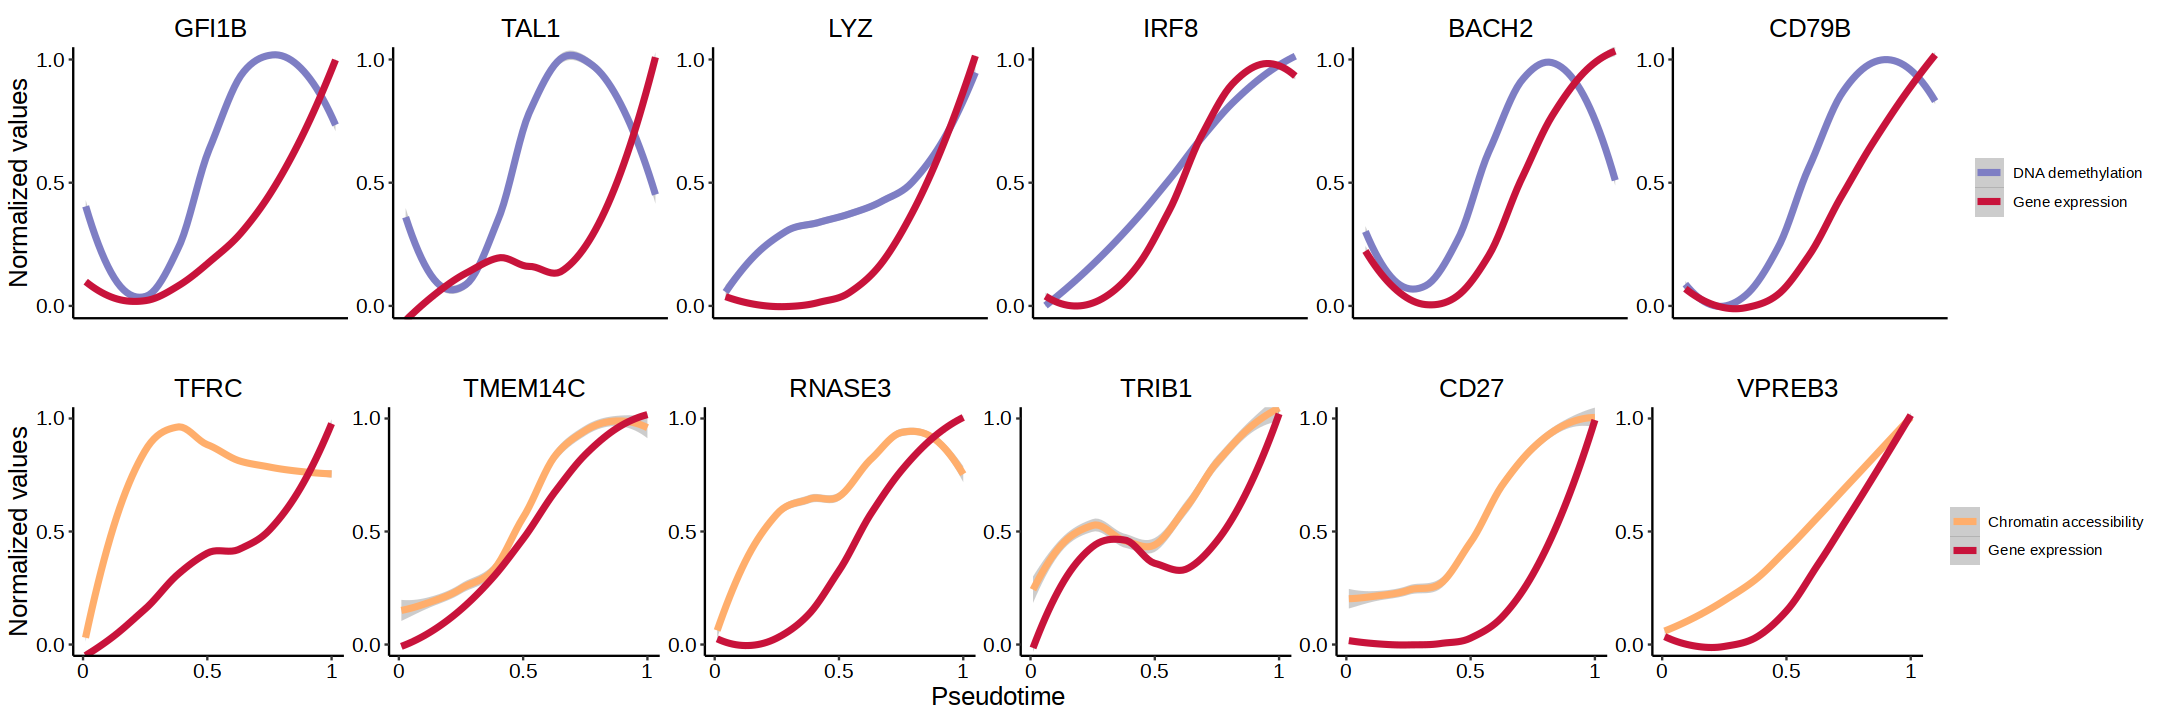

In [41]:
options(repr.plot.width=18, repr.plot.height=6)
ggdraw() + 
    draw_plot(p1, x = .0, y = .5, width = 1, height = .5) +
    draw_plot(p2, x = .0, y = .0, width = 1, height = .5) 

### Fig6d

In [44]:
load("~/HSPC_zenedo/Fig6/Fig6d.RData")

In [52]:
circos.par(start.degree = 270, clock.wise = FALSE)
grid.col = c(`ACC-unrelate` = "#C0B4AD", `MET-unrelate` = "#C0B4AD", 
             `ACC-sync` = "#D8BE89", `MET-sync` = "#D8BE89", 
             `ACC-prime` = "#D3A196", `MET-prime` = "#D3A196", 
             `ACC-lag` = "#7C9AA9", `MET-lag` = "#7C9AA9")

Warning message:
“'start.degree' can only be modified before `circos.initialize`, or
maybe you forgot to call `circos.clear` in your last plot.”
Warning message:
“'clock.wise' can only be modified before `circos.initialize`, or maybe
you forgot to call `circos.clear` in your last plot.”


In [63]:
col_fun1 = colorRamp2(range(ery_tab$Freq), c("Gainsboro", "DarkSlateGray"), transparency = 0.5)
col_fun2 = colorRamp2(range(mye_tab$Freq), c("Gainsboro", "DarkSlateGray"), transparency = 0.5)
col_fun3 = colorRamp2(range(lym_tab$Freq), c("Gainsboro", "DarkSlateGray"), transparency = 0.5)

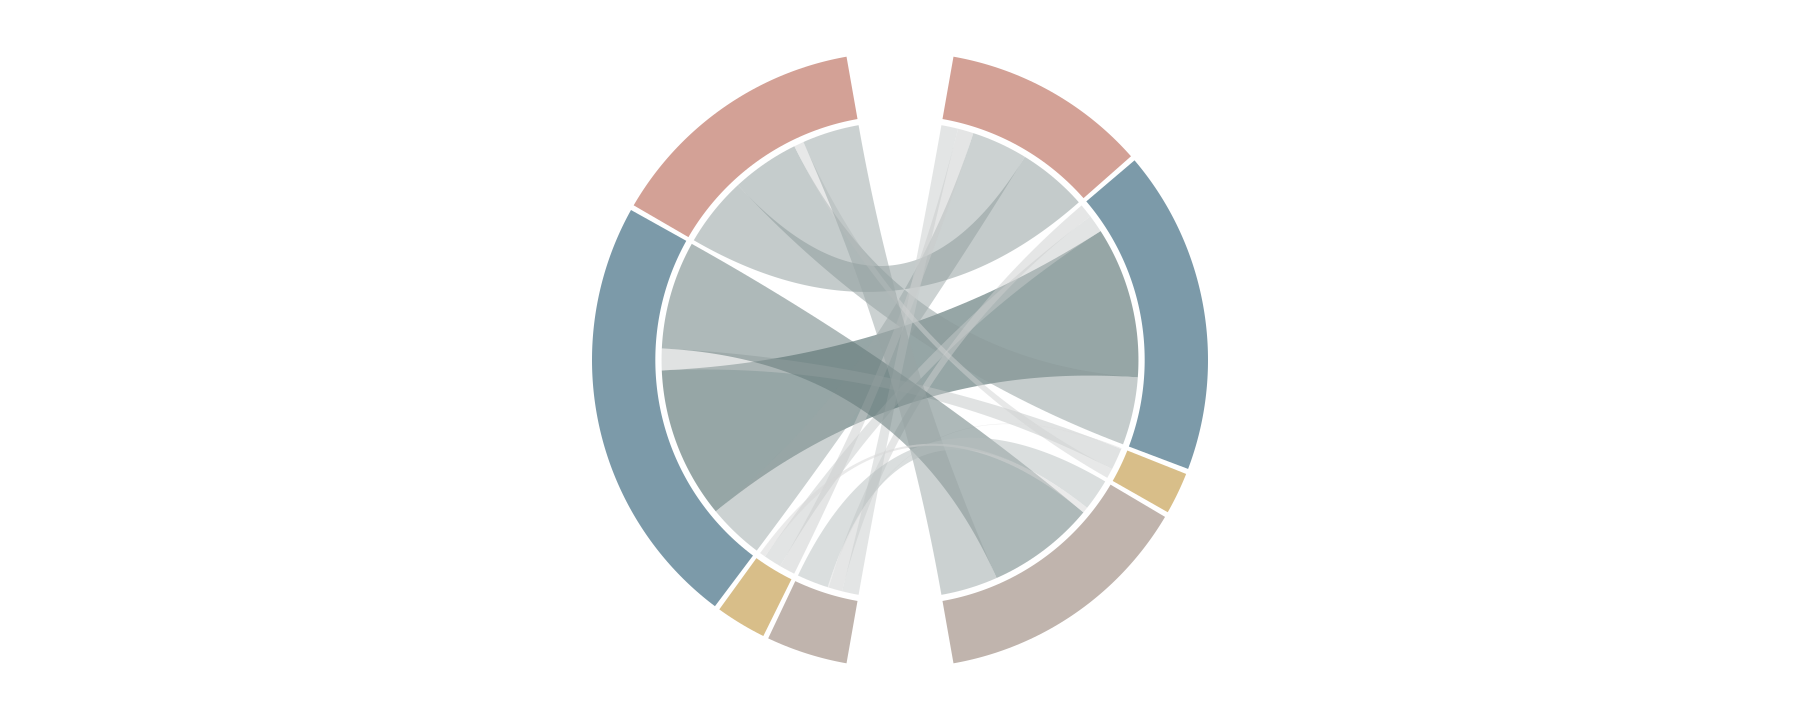

In [78]:
p1 <- chordDiagram(ery_tab, order = c("ACC-unrelate", "ACC-sync", "ACC-lag", "ACC-prime", 
                       "MET-prime", "MET-lag", "MET-sync", "MET-unrelate"), 
             big.gap = 20, grid.col = grid.col, annotationTrackHeight = mm_h(c(15, 15)), 
             annotationTrack =  "grid",col = col_fun1) 

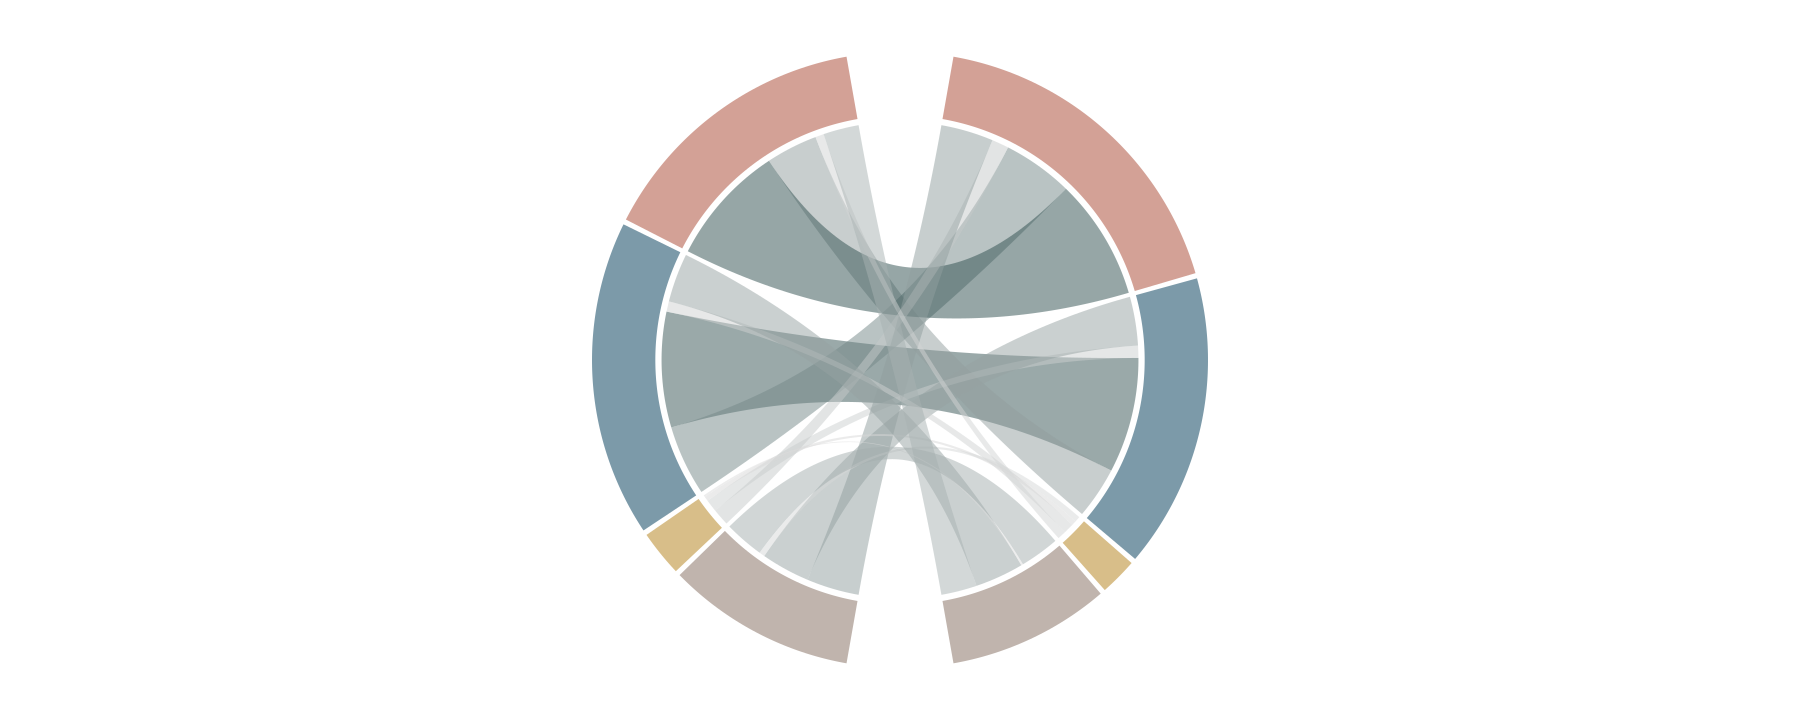

In [79]:
p2 <- chordDiagram(mye_tab, order = c("ACC-unrelate", "ACC-sync", "ACC-lag", "ACC-prime", 
                       "MET-prime", "MET-lag", "MET-sync", "MET-unrelate"), 
             big.gap = 20, grid.col = grid.col, annotationTrackHeight = mm_h(c(15, 15)), 
             annotationTrack =  "grid",col = col_fun2) 

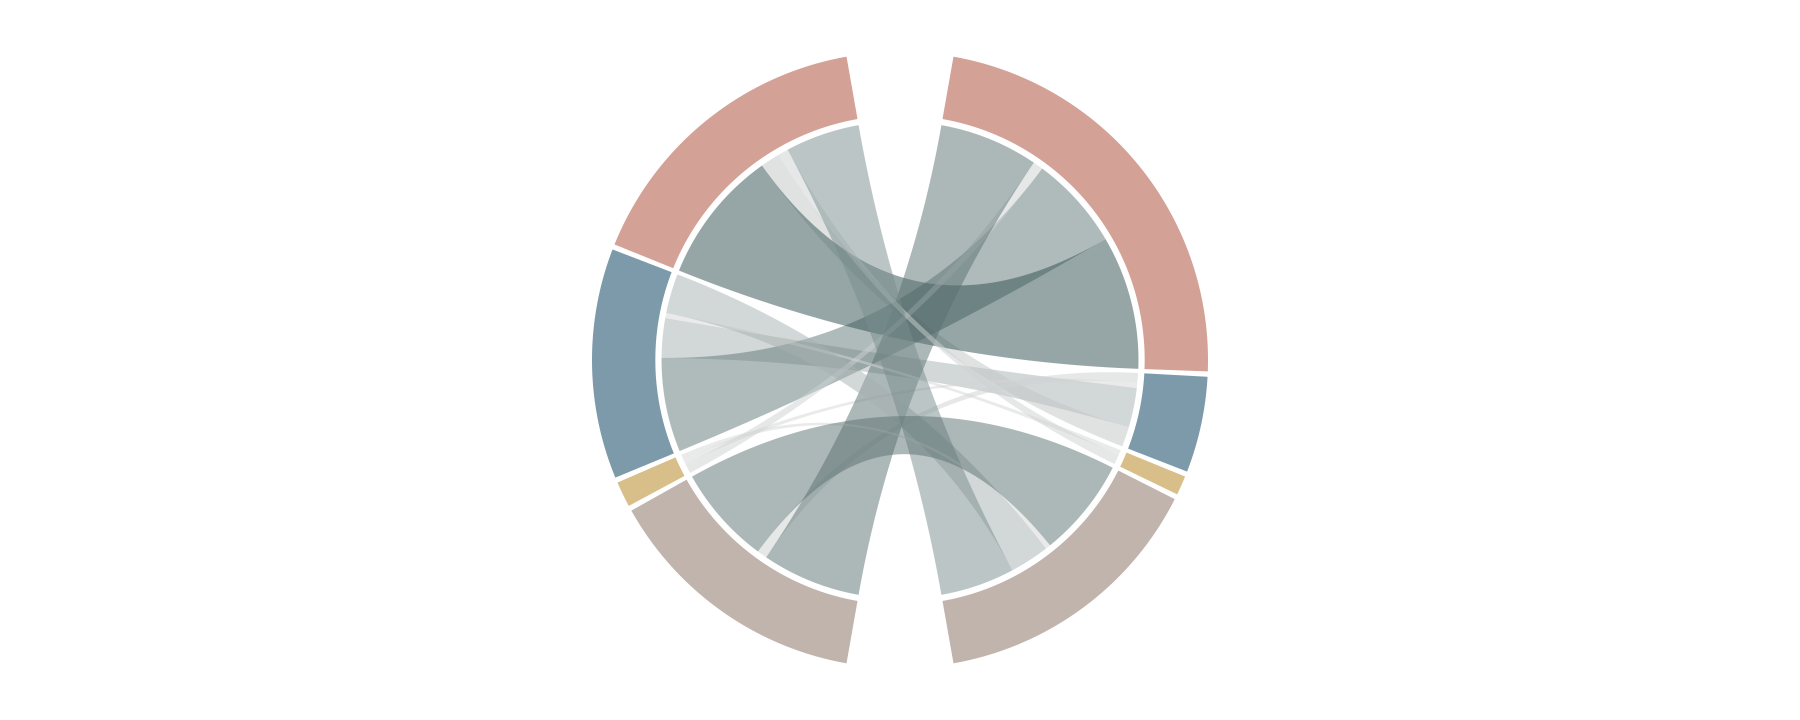

In [80]:
p3 <- chordDiagram(lym_tab, order = c("ACC-unrelate", "ACC-sync", "ACC-lag", "ACC-prime", 
                       "MET-prime", "MET-lag", "MET-sync", "MET-unrelate"), 
             big.gap = 20, grid.col = grid.col, annotationTrackHeight = mm_h(c(15, 15)), 
             annotationTrack =  "grid",col = col_fun3) 